In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the dataset and set the `Timestamp` as the index

In [2]:
file = "data.csv"
df = pd.read_csv(file, index_col="Timestamp")
df.head()

,Gender,Age,What's your favourite Book Genre? (optional),What is your favourite reading medium,"When you read e-books, what is your preferred device?",What is the Highest amount you have spent on a book(NGN)?,What is the lowest amount you have spent on a book(NGN)?,What is the average amount you would rather spend on a book(NGN)?,On average how long does it take you to finish a book,Do you read more than one book at a time?,What is average number of books you read yearly
Timestamp,,,,,,,,,,,
2019/08/09 8:49:30 pm CET,Male,23,Autobiography,e-book,Mobile,2099.0,30.0,2000,I take my time,Yes,20
2019/08/10 8:54:27 am CET,Female,12,You should allow multi selection,A blend of both,Mobile,7000.0,0.0,2000,I take my time,NaN,0
2019/08/10 9:01:12 am CET,Male,27,Fiction,A blend of both,Tablet,3500.0,0.0,500,I take my time,Yes,5
2019/08/10 9:08:16 am CET,Male,30,Fantasy,Paper Back,NaN,4500.0,500.0,3000,I take my time,No,2
2019/08/10 9:18:12 am CET,Male,30,Murder Mystery,A blend of both,Mobile,500.0,2001.0,1000,I take my time,No,200


### Carry out Basic EDA
We start by checking the basic info. We have a total of 228 entries accross 11 columns(questions). 
The survey data was collected over 6 days from the 6th of August 2019 to the 15th of August 2019.
Normally, having non-null values short of the total number of entries would be a course for concern.
Alas, knowing how this data was collected helps in understanding why we have null values. The column(question)
that preceeds it asks for the favourite reading medium. The question breaks into a conditional logic, those who choose the `Paperback` option do not see the question on preferred reading device as the question is of no relevance
to them.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 2019/08/09 8:49:30 pm CET to 2019/08/19 1:06:46 am CET
Data columns (total 11 columns):
Gender                                                               228 non-null object
Age                                                                  228 non-null int64
What's your favourite Book Genre? (optional)                         228 non-null object
What is your favourite reading medium                                228 non-null object
When you read e-books, what is your preferred device?                176 non-null object
What is the Highest amount you have spent on a book(NGN)?            228 non-null float64
What is the lowest amount you have spent on a book(NGN)?             228 non-null float64
What is the average amount you would rather spend on a book(NGN)?    228 non-null int64
On average how long does it take you to finish a book                228 non-null object
Do you read more than one book at a time?            

### Create a small dataframe to show the percentage cetegory of each reading medium

In [4]:
paperback = df['What is your favourite reading medium']
counts = paperback.value_counts()
percentage = paperback.value_counts(normalize = True).mul(100).round(2)
reading_medium = pd.DataFrame({'count':counts, 'percent':percentage})

reading_medium

,count,percent
A blend of both,129,56.58
Paper Back,52,22.81
e-book,47,20.61


### At the moment, we plan to carry out analysis on those who read with digital devices

In [5]:
not_only_paper = df['What is your favourite reading medium'] != 'Paper Back'
digital_responses = df[not_only_paper]

df_new = digital_responses

In [6]:
df_new.describe()

,Age,What is the Highest amount you have spent on a book(NGN)?,What is the lowest amount you have spent on a book(NGN)?,What is the average amount you would rather spend on a book(NGN)?,What is average number of books you read yearly
count,176.000000,176.000000,176.000000,176.000000,176.000000
mean,26.647727,6014.426136,785.232955,3778.431818,26.835227
std,5.936887,9384.701464,2552.059808,8009.249583,83.198909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1500.000000,187.500000,1000.000000,5.000000
50%,26.000000,4000.000000,400.000000,2000.000000,10.000000
75%,30.000000,7000.000000,625.000000,4000.000000,20.000000
max,44.000000,104000.000000,30000.000000,75000.000000,800.000000


### Taking a closer look
We see from the discriptive statistics above that the mean may not be the perfect way to look at the values in 
all the responses shown, mostly because people took the survey and spoofed the values with outrageous responses. We are going to have to take a look at the mean values.

In [7]:
df_new.mean()

Age                                                                    26.647727
What is the Highest amount you have spent on a book(NGN)?            6014.426136
What is the lowest amount you have spent on a book(NGN)?              785.232955
What is the average amount you would rather spend on a book(NGN)?    3778.431818
What is average number of books you read yearly                        26.835227
dtype: float64

In [8]:
df_new.median()

Age                                                                    26.0
What is the Highest amount you have spent on a book(NGN)?            4000.0
What is the lowest amount you have spent on a book(NGN)?              400.0
What is the average amount you would rather spend on a book(NGN)?    2000.0
What is average number of books you read yearly                        10.0
dtype: float64

The Mean age of those who took the survey  26.6


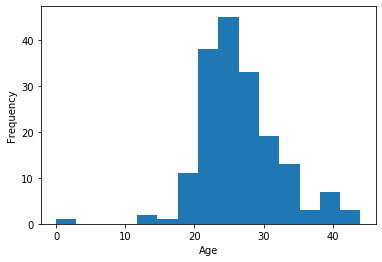

In [9]:
print("The Mean age of those who took the survey ", round(np.mean(df_new.Age), 1))
df_new.Age.plot(kind='hist', bins =15).set_xlabel('Age')
plt.show()

### Boxplot of amount spent on books, also helps to easily identify outliers

Median Highest Amount Spent on books 4000.0


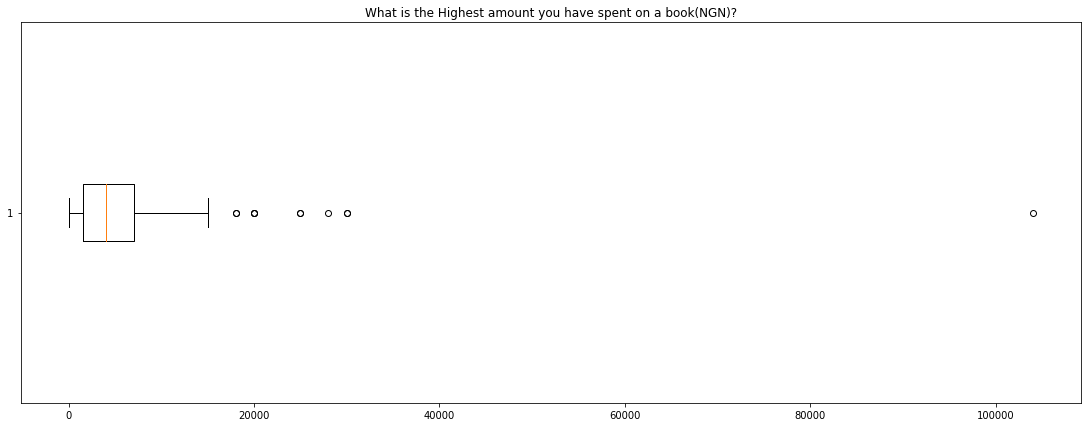

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(19, 7)
ax.set_title('What is the Highest amount you have spent on a book(NGN)?')
ax.boxplot(df_new['What is the Highest amount you have spent on a book(NGN)?'], vert=False)

print("Median Highest Amount Spent on books",df_new['What is the Highest amount you have spent on a book(NGN)?'].median())

Median Lowest Amount Spent on books 400.0


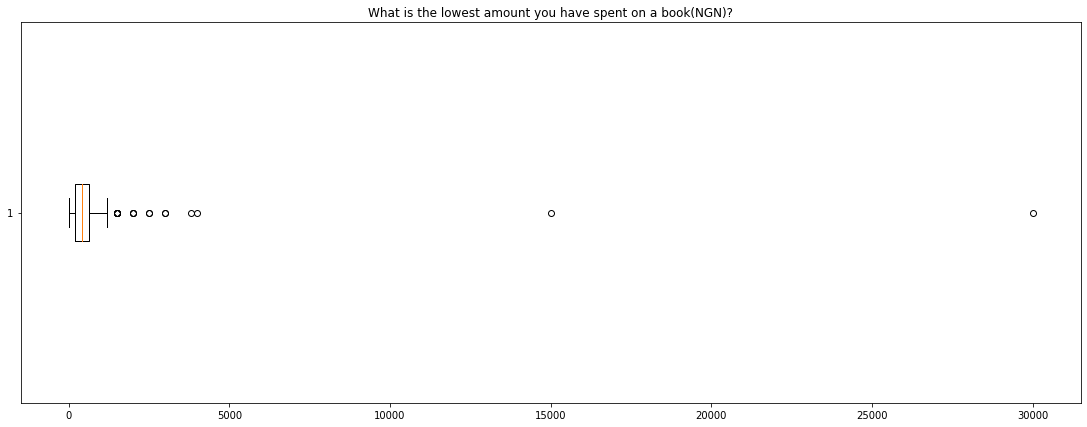

In [11]:
fig2, ax2 = plt.subplots()
fig2.set_size_inches(19, 7)
ax2.set_title('What is the lowest amount you have spent on a book(NGN)?')
ax2.boxplot(df_new['What is the lowest amount you have spent on a book(NGN)?'], vert=False)

#due to the obvious and absurd outliers, we would use median as a more accurate representation of the data
print("Median Lowest Amount Spent on books", df_new["What is the lowest amount you have spent on a book(NGN)?"].median())

Average amount people would rather spend on books 2000.0


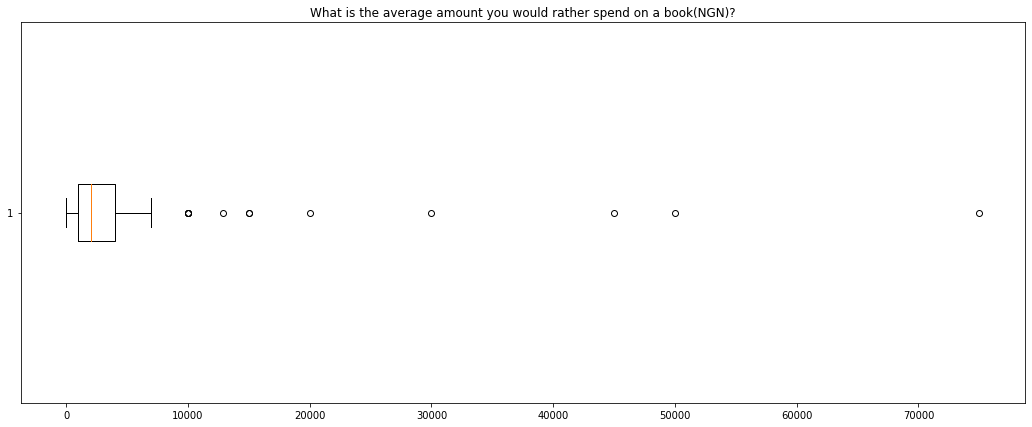

In [12]:
fig3, ax3 = plt.subplots()
fig3.set_size_inches(18, 7)
ax3.set_title('What is the average amount you would rather spend on a book(NGN)?')
ax3.boxplot(df_new['What is the average amount you would rather spend on a book(NGN)?'], vert=False)

print("Average amount people would rather spend on books",df_new['What is the average amount you would rather spend on a book(NGN)?'].median())
      

Median Number of books read yearly: 26.8


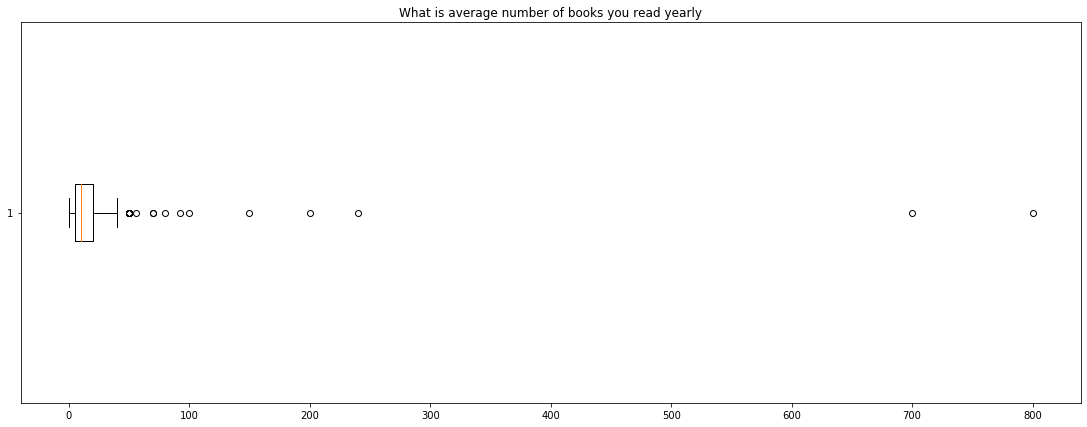

In [13]:
fig4, ax4= plt.subplots()
fig4.set_size_inches(19, 7)
ax4.set_title('What is average number of books you read yearly')
ax4.boxplot(df_new['What is average number of books you read yearly'], vert=False)

print("Median Number of books read yearly:", 
      round(np.mean(df_new['What is average number of books you read yearly']), 1))

In [14]:
df_new.describe()

,Age,What is the Highest amount you have spent on a book(NGN)?,What is the lowest amount you have spent on a book(NGN)?,What is the average amount you would rather spend on a book(NGN)?,What is average number of books you read yearly
count,176.000000,176.000000,176.000000,176.000000,176.000000
mean,26.647727,6014.426136,785.232955,3778.431818,26.835227
std,5.936887,9384.701464,2552.059808,8009.249583,83.198909
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1500.000000,187.500000,1000.000000,5.000000
50%,26.000000,4000.000000,400.000000,2000.000000,10.000000
75%,30.000000,7000.000000,625.000000,4000.000000,20.000000
max,44.000000,104000.000000,30000.000000,75000.000000,800.000000
